In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dynadojo.systems import LDSSystem
from dynadojo.baselines import LinearRegression, DNN
from dynadojo.challenges import FixedComplexity
import pandas as pd

2023-08-22 17:01:02.452978: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
challenge = FixedComplexity(
    N=[10, 50, 100, 500, 1000],
    l=5,
    e=5,
    t=50,
    control_horizons=0,
    max_control_cost_per_dim=0,
    system_cls=LDSSystem,
    reps=10,
    test_examples=50,
    test_timesteps=50,
)
data1 = challenge.evaluate(LinearRegression, id="linear regression")
data2 = challenge.evaluate(DNN, model_kwargs={"activation": "relu"}, fit_kwargs={"epochs": 20}, id="nonlinear network")
data3 = challenge.evaluate(DNN, fit_kwargs={"epochs": 20}, id="linear network")

n=10, latent_dim=5, embed_dim=5, timesteps=50, control_horizons=0,  rep_id=0, id='linear regression'
n=10, latent_dim=5, embed_dim=5, timesteps=50, control_horizons=0,  rep_id=1, id='linear regression'
n=10, latent_dim=5, embed_dim=5, timesteps=50, control_horizons=0,  rep_id=2, id='linear regression'
n=10, latent_dim=5, embed_dim=5, timesteps=50, control_horizons=0,  rep_id=3, id='linear regression'
n=50, latent_dim=5, embed_dim=5, timesteps=50, control_horizons=0,  rep_id=1, id='linear regression'
n=50, latent_dim=5, embed_dim=5, timesteps=50, control_horizons=0,  rep_id=2, id='linear regression'
n=50, latent_dim=5, embed_dim=5, timesteps=50, control_horizons=0,  rep_id=3, id='linear regression'
n=50, latent_dim=5, embed_dim=5, timesteps=50, control_horizons=0,  rep_id=0, id='linear regression'
n=100, latent_dim=5, embed_dim=5, timesteps=50, control_horizons=0,  rep_id=1, id='linear regression'
n=100, latent_dim=5, embed_dim=5, timesteps=50, control_horizons=0,  rep_id=2, id='linear 

In [26]:
data = pd.concat((data1, data2, data3))
data.head()

,rep,n,latent_dim,embed_dim,timesteps,control_horizons,error,total_cost,id
0,0,10,5,5,50,0,2.641685e-08,0,linear regression
1,0,50,5,5,50,0,3.600458e-08,0,linear regression
2,0,100,5,5,50,0,4.639788e-08,0,linear regression
3,0,500,5,5,50,0,2.845413e-08,0,linear regression
4,0,1000,5,5,50,0,2.244216e-08,0,linear regression


<Figure size 640x480 with 0 Axes>

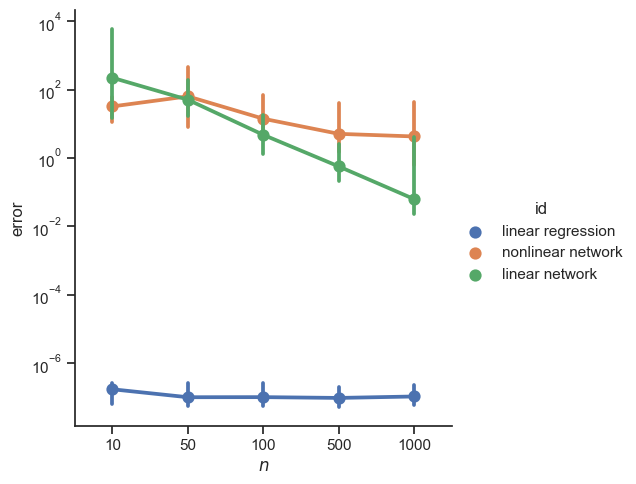

In [24]:
challenge.plot(data)